In [2]:
"""
@author: Brian Yang
@last updated: 05/20/2021
@reference: https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy
"""

'\n@author: Brian Yang\n@last updated: 05/20/2021\n'

In [125]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import json
import re
import circlify

In [7]:
sourceURL = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vSarN4YCESL2B7fMvyX8mtOirsX4gjxJxcXuAHgHX7YL6r1RO1i5X6b6KHaYBNyChglfd3oTydnIbpm/pub?gid=1227834430&single=true&output=csv"

In [159]:
df = pd.read_csv(sourceURL, encoding='utf8')
df.head()

,Project,description,submission link,project link,wdc website link,github link,Year,Unnamed: 7,Team members,Unnamed: 9,...,Data,Quality,Visualization,Accessibility,Unnamed: 31,Water Systems,Equity,Safety,Reliability,Sustainability
0,Aggregating Municipal and State Open Data for ...,Water quality monitoring required by municipal...,NaN,PAPER: Aggregating Municipal and State Open Da...,NaN,NaN,2016,NaN,"Eric Bollens, Jason Locklin, Jonny Sandu, Just...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA H2Open,"In April 2015, Governor Brown mandated a 25 pe...",NaN,APPLICATION: CA H2Open,NaN,NaN,2016,NaN,"Andrew Holguin, Yoni Ackerman, Frank Loge, Edw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Microsoft Cortana Intelligence,Our project submission is a proof-of-concept e...,NaN,BROKEN APPLICATION: Microsoft Cortana Intellig...,NaN,NaN,2016,NaN,Michael Cruz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Dams of California,The Dams of California is a data visualization...,NaN,APPLICATION: The Dams of California,NaN,NaN,2016,NaN,Roy Fleshman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Preliminary Analysis of Surface Water Toxicity...,I found out about this data challenge rather l...,NaN,https://www.waterboards.ca.gov/resources/data_...,NaN,NaN,2016,NaN,Travis Ludlum,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
circledf = df[['Project', 
               'Year', 
               'Topic (Water, Data)', 
               'Subtopic ([Water: Quality, Equity, Reliability/Resiliency, Affordability], [Data: Quality, Accessibility]']]

circledf = circledf.rename(columns={'Topic (Water, Data)':'Topic', 
                                    'Subtopic ([Water: Quality, Equity, Reliability/Resiliency, Affordability], [Data: Quality, Accessibility]':'Subtopic'})

# circledf['Project'] = circledf['Project'].str.lower()
circledf['Topic'] = circledf['Topic'].str.lower()
circledf['Topic'] = circledf['Topic'].str.slice(stop=1)
circledf['Subtopic'] = circledf['Subtopic'].str.lower()
circledf['Subtopic'] = circledf['Subtopic'].str.slice(stop=1)

# circledf['Count'] = circledf.Project.str.len()
circledf['Count'] = df['Team members'].str.count(',')+1

circledf.head()

,Project,Year,Topic,Subtopic,Count
0,Aggregating Municipal and State Open Data for ...,2016,d,q,8
1,CA H2Open,2016,w,r,4
2,Microsoft Cortana Intelligence,2016,d,a,1
3,The Dams of California,2016,d,a,1
4,Preliminary Analysis of Surface Water Toxicity...,2016,w,q,1


In [171]:
yr16df = circledf[circledf['Year'] == 2016]
yr18df = circledf[circledf['Year'] == 2018]
yr19df = circledf[circledf['Year'] == 2019]
yr20df = circledf[circledf['Year'] == 2020]

In [172]:
d2016df = yr16df[yr16df['Topic'] == 'd']
w2016df = yr16df[yr16df['Topic'] == 'w']

d2018df = yr18df[yr18df['Topic'] == 'd']
w2018df = yr18df[yr18df['Topic'] == 'w']

d2019df = yr19df[yr19df['Topic'] == 'd']
w2019df = yr19df[yr19df['Topic'] == 'w']

d2020df = yr20df[yr20df['Topic'] == 'd']
w2020df = yr20df[yr20df['Topic'] == 'w']

In [173]:
d16adf = d2016df[d2016df['Subtopic'] == 'a']
d16qdf = d2016df[d2016df['Subtopic'] == 'q']

w16adf = w2016df[w2016df['Subtopic'] == 'a']
w16edf = w2016df[w2016df['Subtopic'] == 'e']
w16qdf = w2016df[w2016df['Subtopic'] == 'q']
w16rdf = w2016df[w2016df['Subtopic'] == 'r']

In [174]:
d18adf = d2018df[d2018df['Subtopic'] == 'a']
d18qdf = d2018df[d2018df['Subtopic'] == 'q']

w18adf = w2018df[w2018df['Subtopic'] == 'a']
w18edf = w2018df[w2018df['Subtopic'] == 'e']
w18qdf = w2018df[w2018df['Subtopic'] == 'q']
w18rdf = w2018df[w2018df['Subtopic'] == 'r']

In [175]:
d19adf = d2019df[d2019df['Subtopic'] == 'a']
d19qdf = d2019df[d2019df['Subtopic'] == 'q']

w19adf = w2019df[w2019df['Subtopic'] == 'a']
w19edf = w2019df[w2019df['Subtopic'] == 'e']
w19qdf = w2019df[w2019df['Subtopic'] == 'q']
w19rdf = w2019df[w2019df['Subtopic'] == 'r']

In [176]:
d20adf = d2020df[d2020df['Subtopic'] == 'a']
d20qdf = d2020df[d2020df['Subtopic'] == 'q']

w20adf = w2020df[w2020df['Subtopic'] == 'a']
w20edf = w2020df[w2020df['Subtopic'] == 'e']
w20qdf = w2020df[w2020df['Subtopic'] == 'q']
w20rdf = w2020df[w2020df['Subtopic'] == 'r']

In [177]:
data = [{
    'id': 'Water Data Challenge',
    'datum': np.sum(circledf.Count),
    'children': [
        { 'id': 2016, 'datum': np.sum(yr16df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2016df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d16adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d16adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d16qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d16qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2016df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w16adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w16edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w16qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w16rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2018, 'datum': np.sum(yr18df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2018df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d18adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d18adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d18qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d18qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2018df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w18adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w18edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w18qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w18rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2019, 'datum': np.sum(yr19df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2019df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d19adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d19adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d19qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d19qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2019df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w19adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w19edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w19qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w19rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2020, 'datum': np.sum(yr20df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2020df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d20adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d20adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d20qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d20qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2020df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w20adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w20edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w20qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w20rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20rdf.iterrows()
                ]}
            ]}
        ]}
    ]
}]

In [178]:
circles = circlify.circlify(
    data, 
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

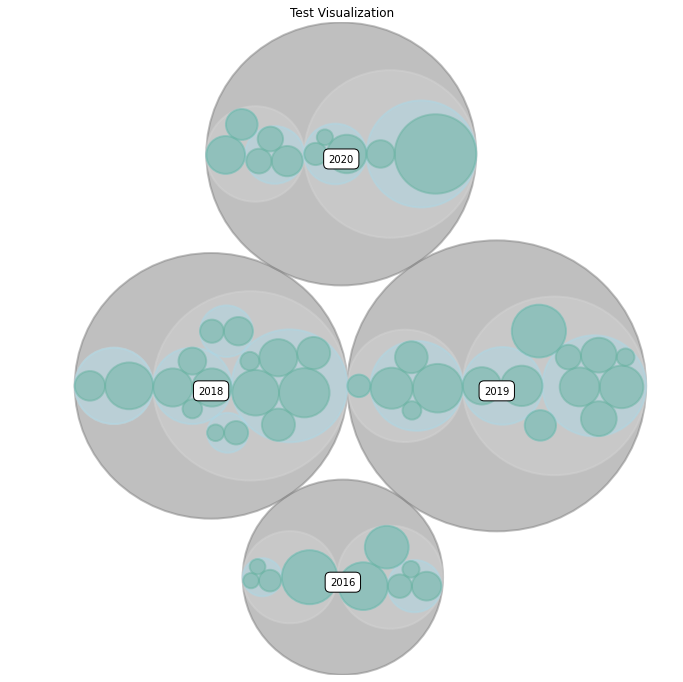

In [179]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title('Test Visualization')
ax.axis('off')

lim = max(
    max( abs(circle.x) + circle.r, abs(circle.y) + circle.r )
    for circle in circles
)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="grey"))

for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightgrey"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 4:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 5:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

